We are asumming, the significance:
$$
\kappa=\frac{\sum s_i w_i-N \sqrt{\sum b_i w_i^2}}{\sqrt{\sum\left(s_i+b_i\right) w_i^2}}
$$
where $s_i$ and $b_i$ are the number of signal and background events in the $i$-th bin, and $w_i$ is the weight of the $i$-th bin. The weights are defined as:
$$
w_i=\ln \left(1+\frac{s_i}{b_i}\right)
$$

Note that for a single bin and strong signal, the optimized power of analysis is:
$$
\kappa=\frac{s}{\sqrt{s+b}}
$$

In [17]:
import numpy as np


def approx_global_sig(sig: np.array, bkg: np.array, N: float = 0.0) -> float:
    """
    Calculates the statistical significance of a signal over background in a given
    dataset using a modified version of the formula (S -N sqrt(B))/sqrt(S+B),
    where S is the number of signal events, B is the number of background events,
    and N is the expected number of background sigmas in the signal region.

    Parameters:
    sig (np.array): Array containing the number of signal events in each bin.
    bkg (np.array): Array containing the number of background events in each bin.
    N (float): Expected number of background events in the signal region.
        Default value is 0.0.

    Returns:
    float: The statistical significance of the signal.
    """
    # Calculate weight factor w for each bin
    w = np.log(1.0 + sig / (bkg + 1e-9))

    # Calculate intermediate quantities
    s_w = sig * w
    b_w = bkg * w
    s_ww = sig * w**2
    b_ww = bkg * w**2

    # Calculate numerator and denominator of modified formula
    num = np.sum(s_w) - N * np.sqrt(np.sum(b_ww))
    den = np.sqrt(np.sum(s_ww + b_ww))

    # Calculate statistical significance and return it
    return num / den

In [18]:
from load_data import histograms, xu_masses, phi_masses

histograms["xu_1000_phi_1"].head()
# histograms["xu_1000_phi_1"].tail()

,bin_center,signal,ttbarmumu,ttbarmumumunu,background
0,0.01,4463.592229,0.005117,0.000004,0.005121
1,0.03,16.598630,0.005141,0.000005,0.005146
2,0.05,9.176478,0.002950,0.000005,0.002955
3,0.07,2.114189,0.002988,0.000005,0.002993
4,0.09,0.944637,0.002669,0.000005,0.002675


In [19]:
import pandas as pd
from itertools import product

# DataFrame to store the significance values
significances = pd.DataFrame(index=phi_masses, columns=xu_masses)

# Calculate the significance for each bin
for x, y in product(xu_masses, phi_masses):
    sig = histograms[f"xu_{x}_phi_{y}"]["signal"]
    bkg = histograms[f"xu_{x}_phi_{y}"]["background"]
    significances.at[y, x] = approx_global_sig(sig, bkg)

significances.columns = [f"xu_{int(x)}_GeV" for x in xu_masses]
significances.index = [f"phi_{int(x)}_GeV" for x in phi_masses]
significances

,xu_500_GeV,xu_750_GeV,xu_1000_GeV,xu_1500_GeV,xu_2000_GeV
phi_1_GeV,139.151001,95.839057,67.010176,33.039877,15.841746
phi_5_GeV,139.013688,95.573418,66.917455,33.008692,15.821794
phi_10_GeV,138.368822,95.464988,66.778992,32.98825,15.801283
phi_50_GeV,135.259948,94.203149,66.263162,32.860808,15.719156
phi_100_GeV,128.904564,91.980948,65.31539,32.582499,15.685688
phi_325_GeV,35.880618,75.519194,59.142255,31.284624,15.338968


(<Figure size 640x480 with 2 Axes>, <Axes: >, 0)

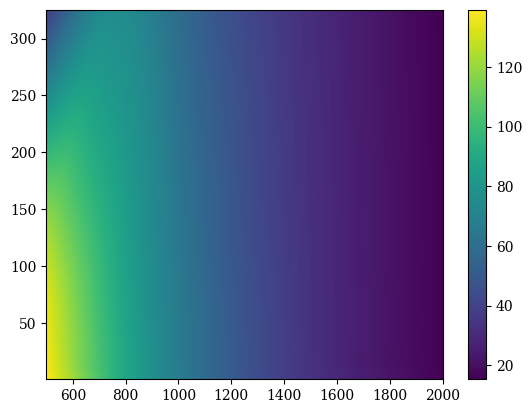

In [21]:
from heatmaps_tools import plot_heatmap, smooth

significances.columns = [float(x) for x in xu_masses]
significances.index = [float(x) for x in phi_masses]
# Convert data to float
significances = significances.astype(float)


plot_heatmap(smooth(significances))